<h1>Developing a Text Classifier</h1>

<h2>Exercise 1: Hierarchical Clustering</h2>
<br>
Create four clusters from text documents of sklearn's “The 20 newsgroups text dataset” using hierarchical clustering. Compare it with their actual categories.

In [1]:
from sklearn.datasets import fetch_20newsgroups
from scipy.cluster.hierarchy import ward, dendrogram
import matplotlib as mpl
from scipy.cluster.hierarchy import fcluster
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

Let's download a list of stop words and the <code>Wordnet</code> corpus from <code>nltk</code>

In [2]:
# Download stopwords
nltk.download('stopwords')

# Specify language
stop_words = stopwords.words('english')

# Add individual printable characters to list of stop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)

# Download de Wordnet corpus
nltk.download('wordnet')

# Prepare the lemmatizer
lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kleye\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\kleye\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Let's specify the categories <code>misc.forsale</code>, <code>sci.electronics</code> and <code>talk.religion.misc</code> of news articles we want to fetch by.

In [3]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

Let's fecth the data

In [4]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

Let's view the data of the fetched content:

In [7]:
news_data['data'][:5]

['From: Steve@Busop.cit.wayne.edu (Steve Teolis)\nSubject: Re: *** TurboGrafx System For SALE ***\nOrganization: Wayne State University\nLines: 38\nDistribution: na\nNNTP-Posting-Host: 141.217.75.24\n\n>TurboGrafx-16 Base Unit (works like new) with:\n>       1 Controller\n>       AC Adapter\n>       Antenna hookup\n>     * Games:\n>         Kieth Courage\n>         Victory Run\n>         Fantasy Zone\n>         Military Madness\n>         Battle Royal\n>         Legendary Axe\n>         Blazing Lasers\n>         Bloody Wolf\n>\n>  --------------------------------------\n>* Will sell games separatley at $25 each\n>  --------------------------------------\n\nYour kidding, $210.00, man o man, you can buy the system new for $49.00 at \nElectronic Boutique and those games are only about $15 - $20.00 brand new.  \nMaybe you should think about that price again if you REALLY need the money.\n\n\n\n\n\n\n                        \n                        \n                        -=-=-=-=-=-=-=-

Checking the categories of news articles

In [8]:
news_data.target

array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

Checking the categories we are dealing with

In [9]:
news_data.target_names

['misc.forsale', 'sci.electronics', 'talk.religion.misc']

Let's store <code>news_data</code> and the corresponding categories in a pandas DataFrame and take a look at it

In [10]:
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


Let's count the number of occurrences of each category appearing in this dataset

In [11]:
news_data_df.category.value_counts()

1    591
0    585
2    377
Name: category, dtype: int64

In the next cell, we will use a <code>lambda</code> function to extract tokens from each <code>'text'</code> raw of the <code>news_data_df DataFrame</code>, check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We make use of the <code>join</code> function to concatenate a list of words into a single sentence. We use the regular expression (<code>re</code>) to replace anything other than alphabets, digits, and white spaces with blank space.

In [14]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
    for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

In [15]:
news_data_df.shape

(1553, 3)

Let's create a <code>tf-idf</code> matrix and transform it to a <code>DataFrame</code>

In [16]:
tfidf_model = TfidfVectorizer(max_features=200)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


Let's create a distance matrix by subtracting the cosine similarities of the <code>tf-idf</code> representation of documents from number 1. The <code>ward</code> function is used to create a linkage matrix, used in hierarchical clustering.

In [17]:
dist = 1 - cosine_similarity(tfidf_df)
linkage_matrix = ward(dist)

Let's truncate the dendrogram to keep the last four clusters. The leaves of a dendrogram refer to the individual instances that are data points. <code>leaf_rotation</code> denotes the angle by which leaf levels must be rotated. <code>leaf_font_size</code> denotes the font size of leaf labels.

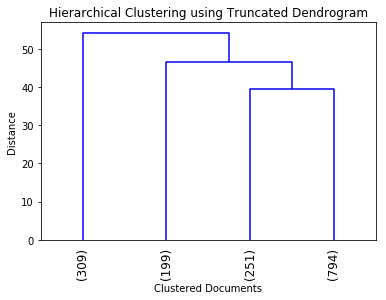

In [20]:
#Truncating the Dendogram Truncation to show last 4 clusters
plt.title('Hierarchical Clustering using Truncated Dendrogram')
plt.xlabel('Clustered Documents')
plt.ylabel('Distance')
dendrogram(
    linkage_matrix,
    truncate_mode='lastp',# showing only last p clusters after merging
    p=4,# p is the number of cluster that should remain after merging 
    leaf_rotation=90.,
    leaf_font_size=12.
)
plt.show()

Now, we'll use the <code>fcluster()</code> function to obtain cluster labels of clusters obtained by hierarchical clustering

In [21]:
k=4
clusters = fcluster(linkage_matrix, k, criterion='maxclust')
clusters

array([3, 3, 3, ..., 4, 4, 1], dtype=int32)

Finally, we make use of the <code>crosstab</code> function of pandas to compare the clusters we have obtained with the actual categories of news articles.

In [23]:
news_data_df['obtained_clusters'] = clusters
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
            news_data_df['obtained_clusters'].\
            replace({1 : 'cluster_1', 2 : 'cluster_2', 3 : 'cluster_3', 4: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,155,0,230,200
sci.electronics,110,1,19,461
talk.religion.misc,44,198,2,133


<h2>Exercise 2: K-Means Clustering</h2>
<br>
Let's create four clusters from text documents in sklearn's "fetch_20 newsgroups" text dataset using <code>k-means</code> clustering. We will compare these clusters with the actual categories and use the <i>elbow method</i> to obtain the optimal number of clusters.

In [24]:
import pandas as pd
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns; 
sns.set()
import numpy as np
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans

We will be using stop words from the English language only. Also, we will use the <code>wordnet</code> corpus for lemmatization.

In [25]:
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
lemmatizer = WordNetLemmatizer()

Specify the categories of news articles we want to fetch by

In [26]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

Fetch the dataset

In [27]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

In the next cell, we will use a <code>lambda</code> function to extract tokens from each <code>'text'</code> raw of the <code>news_data_df DataFrame</code>, check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We make use of the <code>join</code> function to concatenate a list of words into a single sentence. We use the regular expression (<code>re</code>) to replace anything other than alphabets, digits, and white spaces with blank space.

In [29]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
                     for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

Let's create a <code>tf-idf</code> matrix and transform it into a dataframe

In [30]:
tfidf_model=TfidfVectorizer(max_features=200)
tfidf_df=pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns=sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,10,100,12,14,15,16,20,25,30,...,well,wire,wiring,without,word,work,world,would,writes,year
0,0.435655,0.0,0.000000,0.0,0.000000,0.127775,0.136811,0.127551,0.133311,0.0,...,0.0,0.0,0.0,0.0,0.0,0.113042,0.000000,0.000000,0.000000,0.0
1,0.000000,0.0,0.000000,0.0,0.000000,0.294937,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
2,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0
3,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.142267,0.106317,0.100306,0.0
4,0.000000,0.0,0.207003,0.0,0.191897,0.182138,0.000000,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0


Let's use the <code>KMeans</code> function of <code>sklearn</code> to create four clusters from a <code>tf-idf</code> representation of news articles

In [31]:
kmeans = KMeans(n_clusters=4)
kmeans.fit(tfidf_df)
y_kmeans = kmeans.predict(tfidf_df)
news_data_df['obtained_clusters'] = y_kmeans

Let's use pandas's <code>crosstab</code> function to compare the clusters we have obtained with the actual categories of the news articles

In [32]:
pd.crosstab(news_data_df['category'].replace({0:'misc.forsale', 1:'sci.electronics', 2:'talk.religion.misc'}),\
            news_data_df['obtained_clusters'].replace({0 : 'cluster_1', 1 : 'cluster_2', 2 : 'cluster_3', 3: 'cluster_4'}))

obtained_clusters,cluster_1,cluster_2,cluster_3,cluster_4
category,,,,
misc.forsale,129,1,103,352
sci.electronics,172,0,410,9
talk.religion.misc,82,216,79,0


Finally, to obtain the optimal value of $k$, that is, the number of clusters, we execute the <code>k-means</code> algorithm for values of $k$ ranging from $1$ to $6$. For each value of $k$, we store the distortion, that is, the mean of distances of documents from their nearest cluster center. We look for the value of $k$ where the slope of the plot changes rapidly.

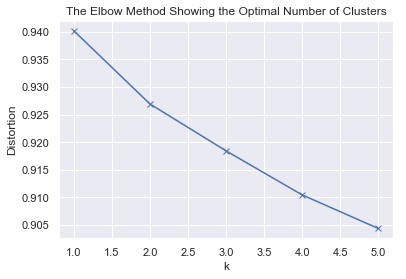

In [35]:
distortions = []
K = range(1,6)

for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(tfidf_df)
    distortions.append(sum(np.min(cdist(tfidf_df, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / tfidf_df.shape[0])

plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method Showing the Optimal Number of Clusters')
plt.show()

<h2>Exercise 3: Text Classification (Logistic regression, Naive Bayes and KNN)</h2>
<br>
In this exercise, we will classify reviews of musical instruments on Amazon with the help of various classification algorithms, such as logistic regression, Naïve Bayes, and KNN

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

Now, we will read the data file in <code>JSON</code> format using <code>pandas</code>

In [2]:
review_data = pd.read_json('reviews_Musical_Instruments_5.json', lines=True)
review_data[['reviewText', 'overall']].head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5
1,The product does exactly as it should and is q...,5
2,The primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,5
4,This pop filter is great. It looks and perform...,5


In the next cell, we will use a <code>lambda</code> function to extract tokens from each <code>'reviewText'</code> raw of the <code>news_data_df DataFrame</code>, check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We make use of the <code>join</code> function to concatenate a list of words into a single sentence. We use the regular expression (<code>re</code>) to replace anything other than alphabets, digits, and white spaces with blank space.

In [3]:
lemmatizer = WordNetLemmatizer()
review_data['cleaned_review_text'] = review_data['reviewText'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))]))

Now, we'll create a <code>DataFrame</code> from the TFIDF matrix representation of the cleaned version of <code>reviewText</code>

In [4]:
review_data[['cleaned_review_text', 'reviewText', 'overall']].head()

,cleaned_review_text,reviewText,overall
0,not much to write about here but it doe exactl...,"Not much to write about here, but it does exac...",5
1,the product doe exactly a it should and is qui...,The product does exactly as it should and is q...,5
2,the primary job of this device is to block the...,The primary job of this device is to block the...,5
3,nice windscreen protects my mxl mic and preven...,Nice windscreen protects my MXL mic and preven...,5
4,this pop filter is great it look and performs ...,This pop filter is great. It looks and perform...,5


Now, we'll create a tf-idf matrix and transform it into a <code>DataFrame</code>

In [5]:
tfidf_model = TfidfVectorizer(max_features=500)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(review_data['cleaned_review_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,100,12,20,34,able,about,accurate,acoustic,actually,...,won,work,worked,worth,would,wrong,year,yet,you,your
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.159684,0.0,0.0,0.0,...,0.0,0.134327,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.085436,0.0,0.0,0.000000,0.0,0.0,0.0,0.067074,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.115312,0.0,0.0,0.0,0.079880,0.111989
3,0.0,0.0,0.0,0.0,0.0,0.339573,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.303608,0.000000


The following lines of code are used to create a new column target, which will have $0$ if the <code>overall</code> parameter is less than $4$, and $1$ otherwise.
<br>
<br>
Let's consider review with <code>overall</code> $score <= 4$ to be negative (encode it as $0$)  and overall $score > 4$ to be positive (encode it as 1)

In [6]:
review_data['target'] = review_data['overall'].apply(lambda x : 0 if x<=4 else 1)
review_data['target'].value_counts()

1    6938
0    3323
Name: target, dtype: int64

Now, we will use <code>LogisticRegression()</code> from <code>sklearn</code>, to fit a logistic regression model on the TF-IDF representation of these reviews after cleaning. 

In [11]:
logreg = LogisticRegression()
logreg.fit(tfidf_df,review_data['target'])
predicted_labels = logreg.predict(tfidf_df)
logreg.predict_proba(tfidf_df)[:,1]

array([0.57128792, 0.68592533, 0.56024418, ..., 0.65982135, 0.55011397,
       0.21210037])

We further use the <code>crosstab</code> function of <code>pandas</code> to compare the results of our classification model with the actual classes (<code>target</code> in this case) of the reviews.

In [12]:
review_data['predicted_labels'] = predicted_labels
pd.crosstab(review_data['target'], review_data['predicted_labels'])

predicted_labels,0,1
target,,
0,1543,1780
1,626,6312


In this step, we'll be using <code>GaussianNB()</code> from <code>sklearn</code>, to fit a Gaussian Naive Bayes model on the TF-IDF representation of these reviews after cleaning.

In [16]:
nb = GaussianNB()
nb.fit(tfidf_df,review_data['target'])
predicted_labels = nb.predict(tfidf_df)
nb.predict_proba(tfidf_df)[:,1]

array([9.97730158e-01, 3.63599675e-09, 9.45692105e-07, ...,
       2.46001047e-02, 3.43660991e-08, 1.72767906e-27])

We further use the <code>crosstab</code> function of <code>pandas</code> to compare the results of our classification model with the actual classes (<code>target</code> in this case) of the reviews.

In [17]:
review_data['predicted_labels_nb'] = predicted_labels
pd.crosstab(review_data['target'], review_data['predicted_labels_nb'])

predicted_labels_nb,0,1
target,,
0,2333,990
1,2380,4558


Now, we'll be using <code>KNeighborsClassifier()</code> from <code>sklearn</code>, to fit a 3-Nearest Neighbour model on the TF-IDF representation of these reviews after cleaning.

In [22]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(tfidf_df,review_data['target'])
review_data['predicted_labels_knn'] = knn.predict(tfidf_df)

We further use the <code>crosstab</code> function of <code>pandas</code> to compare the results of our classification model with the actual classes (<code>target</code> in this case) of the reviews.

In [21]:
pd.crosstab(review_data['target'], review_data['predicted_labels_knn'])

predicted_labels_knn,0,1
target,,
0,2594,729
1,375,6563


Here, we see $2594$ instances with the target label as $0$ correctly classified and $729$ such instances wrongly classified. Furthermore, $6563$ instances with the target label as $1$ are correctly classified, whereas $375$ such instances are wrongly classified.

<h2>Exercise 4: Regression Analysis Using Textual Data</h2>
<br>
In this exercise, we will use regression to predict the overall scores of reviews of musical instruments on Amazon.

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.linear_model import LinearRegression
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

Now, we will read the data file in <code>JSON</code> format using <code>pandas</code>

In [24]:
review_data = pd.read_json('reviews_Musical_Instruments_5.json', lines=True)
review_data[['reviewText', 'overall']].head()

,reviewText,overall
0,"Not much to write about here, but it does exac...",5
1,The product does exactly as it should and is q...,5
2,The primary job of this device is to block the...,5
3,Nice windscreen protects my MXL mic and preven...,5
4,This pop filter is great. It looks and perform...,5


In the next cell, we will use a <code>lambda</code> function to extract tokens from each <code>'reviewText'</code> raw of the <code>news_data_df DataFrame</code>, check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We make use of the <code>join</code> function to concatenate a list of words into a single sentence. We use the regular expression (<code>re</code>) to replace anything other than alphabets, digits, and white spaces with blank space.

In [26]:
lemmatizer = WordNetLemmatizer()
review_data['cleaned_review_text'] = review_data['reviewText'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))]))
review_data[['cleaned_review_text', 'reviewText', 'overall']].head()

,cleaned_review_text,reviewText,overall
0,not much to write about here but it doe exactl...,"Not much to write about here, but it does exac...",5
1,the product doe exactly a it should and is qui...,The product does exactly as it should and is q...,5
2,the primary job of this device is to block the...,The primary job of this device is to block the...,5
3,nice windscreen protects my mxl mic and preven...,Nice windscreen protects my MXL mic and preven...,5
4,this pop filter is great it look and performs ...,This pop filter is great. It looks and perform...,5


Now, we'll create a <code>DataFrame</code> from the TFIDF matrix representation of the cleaned version of <code>reviewText</code>

In [27]:
tfidf_model = TfidfVectorizer(max_features=500)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(review_data['cleaned_review_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,100,12,20,34,able,about,accurate,acoustic,actually,...,won,work,worked,worth,would,wrong,year,yet,you,your
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.159684,0.0,0.0,0.0,...,0.0,0.134327,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.085436,0.0,0.0,0.000000,0.0,0.0,0.0,0.067074,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.115312,0.0,0.0,0.0,0.079880,0.111989
3,0.0,0.0,0.0,0.0,0.0,0.339573,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.303608,0.000000


Now, we'll be using <code>LinearRegression()</code> from <code>sklearn</code>, to fit a linear regression model on the TF-IDF representation of these reviews after cleaning.

In [29]:
linreg = LinearRegression()
linreg.fit(tfidf_df,review_data['overall'])
linreg.coef_

array([-1.93271993e-01,  5.65226131e-01,  5.63243687e-01, -1.84418658e-01,
       -6.32257431e-02,  3.05320627e-01,  4.95264614e-01,  5.21333693e-01,
        2.65736989e-01,  4.00058256e-01,  5.64020424e-01,  7.56022958e-01,
        1.00174846e-02, -3.06429115e-01, -3.12104234e-01,  3.38294736e-01,
       -6.05747380e-01, -1.04123996e-01,  5.58669738e-02, -1.13320890e-01,
        4.79471129e-01,  1.49528459e-01,  7.79094545e-01, -3.63399268e-01,
        1.25993539e-01, -6.29415062e-02,  4.94517373e-01, -3.34989132e-01,
        2.55374355e-01,  8.84676972e-02, -3.68013360e-01, -1.09910777e-01,
       -7.09777794e-03, -5.15547511e-02,  1.17415090e-01, -8.89213726e-02,
        1.06398798e+00, -1.19791236e+00, -1.14906460e+00,  1.55215016e-01,
       -5.05283241e-01,  2.43200389e-01,  8.56413437e-02, -3.74044994e-02,
       -7.31390217e-03,  9.63911076e-01, -7.82062558e-02,  1.50616236e-01,
       -9.35299622e-02,  1.87239631e-02,  9.34145997e-02,  1.18038260e+00,
       -3.79855115e-01,  

To check the intercept of the linear regression

In [30]:
linreg.intercept_

4.218882428983381

To check the prediction in a tf-idf DataFrame

In [31]:
linreg.predict(tfidf_df)

array([4.19200071, 4.25771652, 4.23084868, ..., 4.40384767, 4.49036403,
       4.14791976])

Finally, we use this model to predict the <code>overall</code> score and store it in a column called <code>predicted_score_from_linear_regression</code>

In [32]:
review_data['predicted_score_from_linear_regression'] = linreg.predict(tfidf_df)
review_data[['overall', 'predicted_score_from_linear_regression']].head(10)

,overall,predicted_score_from_linear_regression
0,5,4.192001
1,5,4.257717
2,5,4.230849
3,5,4.085927
4,5,4.851061
5,5,4.955069
6,5,4.446274
7,3,3.888593
8,5,4.941788
9,5,4.513824


From the preceding table, we can see how the actual and predicted score varies for different instances. We will use this table later to evaluate the performance of the model.

<h2>Exercise 5: Tree-Based Methods (Decision Tree, Random Forest, GBM, and XGBoost)</h2>
<br>
In this exercise, we will use tree-based methods such as decision trees, random forests, GBM, and XGBoost to predict the overall scores and labels of reviews of patio, lawn, and garden on Amazon.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import GradientBoostingClassifier 

from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

Now, we'll read the given data file in <code>json</code> format using <code>pandas</code>

In [3]:
data_patio_lawn_garden = pd.read_json('reviews_Patio_Lawn_and_Garden_5.json', lines=True)
data_patio_lawn_garden[['reviewText', 'overall']].head() 

,reviewText,overall
0,Good USA company that stands behind their prod...,4
1,This is a high quality 8 ply hose. I have had ...,5
2,It's probably one of the best hoses I've ever ...,4
3,I probably should have bought something a bit ...,5
4,I bought three of these 5/8-inch Flexogen hose...,5


We will be using WordNet corpus for lemmatization

In [4]:
lemmatizer = WordNetLemmatizer()

In the next cell, we will use a <code>lambda</code> function to extract tokens from each <code>'reviewText'</code> raw of the <code>news_data_df DataFrame</code>, check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We make use of the <code>join</code> function to concatenate a list of words into a single sentence. We use the regular expression (<code>re</code>) to replace anything other than alphabets, digits, and white spaces with blank space.

In [5]:
data_patio_lawn_garden['cleaned_review_text'] = data_patio_lawn_garden['reviewText'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x)))]))
data_patio_lawn_garden[['cleaned_review_text', 'reviewText', 'overall']].head()

,cleaned_review_text,reviewText,overall
0,good usa company that stand behind their produ...,Good USA company that stands behind their prod...,4
1,this is a high quality 8 ply hose i have had g...,This is a high quality 8 ply hose. I have had ...,5
2,it s probably one of the best hose i ve ever h...,It's probably one of the best hoses I've ever ...,4
3,i probably should have bought something a bit ...,I probably should have bought something a bit ...,5
4,i bought three of these 5 8 inch flexogen hose...,I bought three of these 5/8-inch Flexogen hose...,5


We will be creating a <code>DataFrame</code> from the TFIDF matrix representation of the cleaned version of <code>reviewText</code>

In [6]:
tfidf_model = TfidfVectorizer(max_features=500)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(data_patio_lawn_garden['cleaned_review_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,20,34,8217,able,about,actually,add,after,again,...,work,worked,working,worth,would,yard,year,yet,you,your
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.120568,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.161561,0.000000
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.116566,0.0,0.216988,0.000000,0.049357
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000
4,0.0,0.0,0.0,0.0,0.0,0.064347,0.0,0.0,0.070857,0.0,...,0.0,0.0,0.0,0.0,0.0,0.083019,0.0,0.000000,0.000000,0.000000


The following lines of code are used to create a new column target, which will have $0$ if the overall parameter is less than $4$, otherwise, it will have $1$

In [7]:
data_patio_lawn_garden['target'] = data_patio_lawn_garden['overall'].apply(lambda x : 0 if x<=4 else 1)
data_patio_lawn_garden['target'].value_counts()

1    7037
0    6235
Name: target, dtype: int64

Now, we'll be using <code>tree()</code> from <code>sklearn</code>, to fit a decision tree model on the TF-IDF representation of these reviews after cleaning.

In [8]:
dtc = tree.DecisionTreeClassifier()
dtc = dtc.fit(tfidf_df, data_patio_lawn_garden['target'])
data_patio_lawn_garden['predicted_labels_dtc'] = dtc.predict(tfidf_df)

We'll use the <code>crosstab</code> function of <code>pandas</code> to compare the results of our classification model with the actual classes (<code>target</code> in this case) of the reviews.

In [9]:
pd.crosstab(data_patio_lawn_garden['target'], data_patio_lawn_garden['predicted_labels_dtc'])

predicted_labels_dtc,0,1
target,,
0,6227,8
1,1,7036


Here, we see $6627$ instances with a target label of $0$ correctly classified, and $8$ such instances wrongly classified. Furthermore, $7036$ instances with a target label of $1$ are correctly classified, whereas $1$ such instance is wrongly classified.

In [10]:
dtr = tree.DecisionTreeRegressor()
dtr = dtr.fit(tfidf_df, data_patio_lawn_garden['overall'])
data_patio_lawn_garden['predicted_values_dtr'] = dtr.predict(tfidf_df)
data_patio_lawn_garden[['predicted_values_dtr', 'overall']].head(10)

,predicted_values_dtr,overall
0,4.0,4
1,5.0,5
2,4.0,4
3,5.0,5
4,5.0,5
5,5.0,5
6,5.0,5
7,5.0,5
8,5.0,5
9,4.0,4


From the preceding table, we can see how the actual and predicted score varies for different instances. We will use this table later to evaluate the performance of the model.

Now, we'll define a generic function for all classifier models

In [11]:
def clf_model(model_type, X_train, y):
    model = model_type.fit(X_train,y)
    predicted_labels = model.predict(tfidf_df)
    return predicted_labels

We'll train three kinds of classifier models, namely: random forest, gradient boosting machines, and XGBoost. For random forest, we predict the class labels of the given set of review texts and compare it with their actual class, that is, the target using crosstabs.

In [12]:
rfc = RandomForestClassifier(n_estimators=20,max_depth=4,max_features='sqrt',random_state=1)
data_patio_lawn_garden['predicted_labels_rfc'] = clf_model(rfc, tfidf_df, data_patio_lawn_garden['target'])
pd.crosstab(data_patio_lawn_garden['target'], data_patio_lawn_garden['predicted_labels_rfc'])

predicted_labels_rfc,0,1
target,,
0,3302,2933
1,1557,5480


Here, we see $3302$ instances with a target label of $0$ correctly classified and $2933$ such instances wrongly classified. Furthermore, $5480$ instances with a target label of $1$ are correctly classified, whereas $1557$ such instances are wrongly classified.
<br>
<br>
For GBM, we predict the class labels of the given set of reviewTexts and compare it with their actual class, that is, the target using crosstabs. 

In [13]:
gbc = GradientBoostingClassifier(n_estimators=2,max_depth=3,max_features='sqrt',random_state=1)
data_patio_lawn_garden['predicted_labels_gbc'] = clf_model(gbc, tfidf_df, data_patio_lawn_garden['target'])
pd.crosstab(data_patio_lawn_garden['target'], data_patio_lawn_garden['predicted_labels_gbc'])

predicted_labels_gbc,0,1
target,,
0,101,6134
1,26,7011


Here, we see $101$ instances with a target label of $0$ correctly classified and $6134$ such instances wrongly classified. Furthermore, $7011$ instances with a target label of $1$ are correctly classified, whereas $26$ such instances are wrongly classified.

In [ ]:
xgb_clf = XGBClassifier(n_estimators=20,learning_rate=0.03,max_depth=5,subsample=0.6,colsample_bytree= 0.6,reg_alpha= 10,seed=42)
data_patio_lawn_garden['predicted_labels_xgbc'] = clf_model(xgb_clf, tfidf_df, data_patio_lawn_garden['target'])
pd.crosstab(data_patio_lawn_garden['target'], data_patio_lawn_garden['predicted_labels_xgbc'])

Here, we see $4222$ instances with a target label of $0$ correctly classified, and $2013$ such instances wrongly classified. Furthermore, $4949$ instances with a target label of $1$ are correctly classified, whereas $2088$ such instances are wrongly classified.

Now, we'll define a generic function for all regression models

<h2>Exercise 6: Sampling (Simple Random, Stratified, Multi-Stage)</h2>
<br>
In this exercise, we will extract samples from an online retail dataset, with the help of simple random sampling, stratified sampling, and multi-stage sampling.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_excel('Online Retail.xlsx')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


We use <code>sample</code> function to extract a sample from the DataFrame.

In [3]:
data_sample_random = data.sample(frac=0.1,random_state=42) # selecting 10% of the data randomly
data_sample_random.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
209268,555200,71459,HANGING JAM JAR T-LIGHT HOLDER,24,2011-06-01 12:05:00,0.85,17315.0,United Kingdom
207108,554974,21128,GOLD FISHING GNOME,4,2011-05-27 17:14:00,6.95,14031.0,United Kingdom
167085,550972,21086,SET/6 RED SPOTTY PAPER CUPS,4,2011-04-21 17:05:00,0.65,14031.0,United Kingdom
471836,576652,22812,PACK 3 BOXES CHRISTMAS PANETTONE,3,2011-11-16 10:39:00,1.95,17198.0,United Kingdom
115865,546157,22180,RETROSPOT LAMP,2,2011-03-10 08:40:00,9.95,13502.0,United Kingdom


Now, we'll use <code>train_test_split</code> from <code>sklearn</code> function to create stratified samples

In [4]:
X_train, X_valid, y_train, y_valid = train_test_split(data, data['Country'],test_size=0.2, random_state=42,stratify = data['Country'])
data.shape

(541909, 8)

To check the shape of the training model

In [5]:
X_train.shape

(433527, 8)

We filter out the data in various stages and extract random samples from it. We will extract a random sample of 2% from those transactions by country, which occurred in United Kingdom, Germany, or France and corresponding quantity is >= 2

In [6]:
data_ugf = data[data['Country'].isin(['United Kingdom', 'Germany', 'France'])]
data_ugf_q2 = data_ugf[data_ugf['Quantity']>=2]
data_ugf_q2_sample = data_ugf_q2.sample(frac = .02, random_state=42)
data_ugf_q2_sample.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
224900,556579,22987,WRAP SUMMER ROSE DESIGN,25,2011-06-13 14:16:00,0.42,15069.0,United Kingdom
479100,577137,21137,BLACK RECORD COVER FRAME,96,2011-11-18 08:59:00,3.39,14110.0,United Kingdom
78507,542888,22476,EMPIRE UNION JACK TV DINNER TRAY,3,2011-02-01 13:15:00,4.95,15687.0,United Kingdom
499283,578664,22593,CHRISTMAS GINGHAM STAR,7,2011-11-24 16:59:00,0.85,15910.0,United Kingdom
153888,549831,16156S,WRAP PINK FAIRY CAKES,25,2011-04-12 13:10:00,0.42,14844.0,United Kingdom


<h1>Developing a Text classifier</h1>
<br>
<h2>Exercise 7: Removing Highly Correlated Features (Tokens)</h2>
<br>
In this exercise, we will remove highly correlated words from a tf-idf matrix representation of <code>fetch_20newsgroups</code> text dataset from <code>sklearn</code>

In [17]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.datasets import fetch_20newsgroups

import seaborn as sns
from collections import Counter
from pylab import *
import warnings
warnings.filterwarnings('ignore')

We will be using stop words from the English language only. <code>WordNet</code> states the <code>lemmatizer</code> we will be using.

In [8]:
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
lemmatizer = WordNetLemmatizer()

To specify the categories of news articles we want to fetch by

To fetch sklearn's "the 20 newsgroups" text dataset, corresponding to the categories mentioned earlier.

In [12]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)
news_data_df = pd.DataFrame({'text' : news_data.data, 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


Now, make use of the <code>lambda</code> function to extract tokens from each 'text' of the <code>news_data_df</code> <code>DataFrame</code>. Check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We'll use the join function to concatenate a list of words into a single sentence. We'll use the regular expression (<code>re</code>) to replace anything other than letters, digits, and white spaces with blank space. 

In [14]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
                     for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

The following lines of codes are used to create a tf-idf matrix and transform it to a <code>DataFrame</code>

In [15]:
tfidf_model = TfidfVectorizer(max_features=20)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.124370,0.0,0.068809,0.120711,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.000000,0.0,0.157421,0.000000,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.000000,0.0,0.306407,0.000000,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.245634,0.0,0.135900,0.238407,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.267194,0.0,0.147828,0.259333,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


We'll calculate the correlation matrix for this tf-idf representation

In [16]:
correlation_matrix = tfidf_df.corr()
correlation_matrix.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
00,1.000000,-0.113080,-0.081874,-0.116847,-0.053495,-0.078405,-0.096597,-0.084413,-0.161674,0.026696,-0.084632,-0.076635,-0.208121,-0.083772,0.054777,-0.188759,-0.105828,-0.076621,-0.094492,-0.127518
article,-0.113080,1.000000,0.125853,0.076146,-0.008246,-0.055519,0.025570,-0.000201,-0.158956,-0.121483,-0.046249,0.029978,-0.201204,-0.038486,-0.197164,-0.189810,-0.158022,0.035890,0.015507,0.572650
com,-0.081874,0.125853,1.000000,-0.471456,-0.016128,-0.178742,-0.036333,-0.037284,-0.110011,-0.071355,-0.175256,-0.037293,-0.084630,-0.168613,-0.131051,-0.114145,-0.368688,-0.035631,-0.010214,0.150258
edu,-0.116847,0.076146,-0.471456,1.000000,-0.098067,0.242610,-0.100041,-0.103703,-0.043210,-0.059893,0.247395,-0.119432,0.023394,0.225912,-0.003604,-0.019058,0.371798,-0.126742,-0.152644,0.017169
good,-0.053495,-0.008246,-0.016128,-0.098067,1.000000,-0.098199,0.025899,0.045106,-0.186943,-0.046803,-0.098198,0.074548,-0.166908,-0.089622,-0.115122,-0.176614,-0.101782,0.068633,0.087909,0.056725


Now, we'll plot the correlation matrix using seaborn's <code>heatmap</code> function.

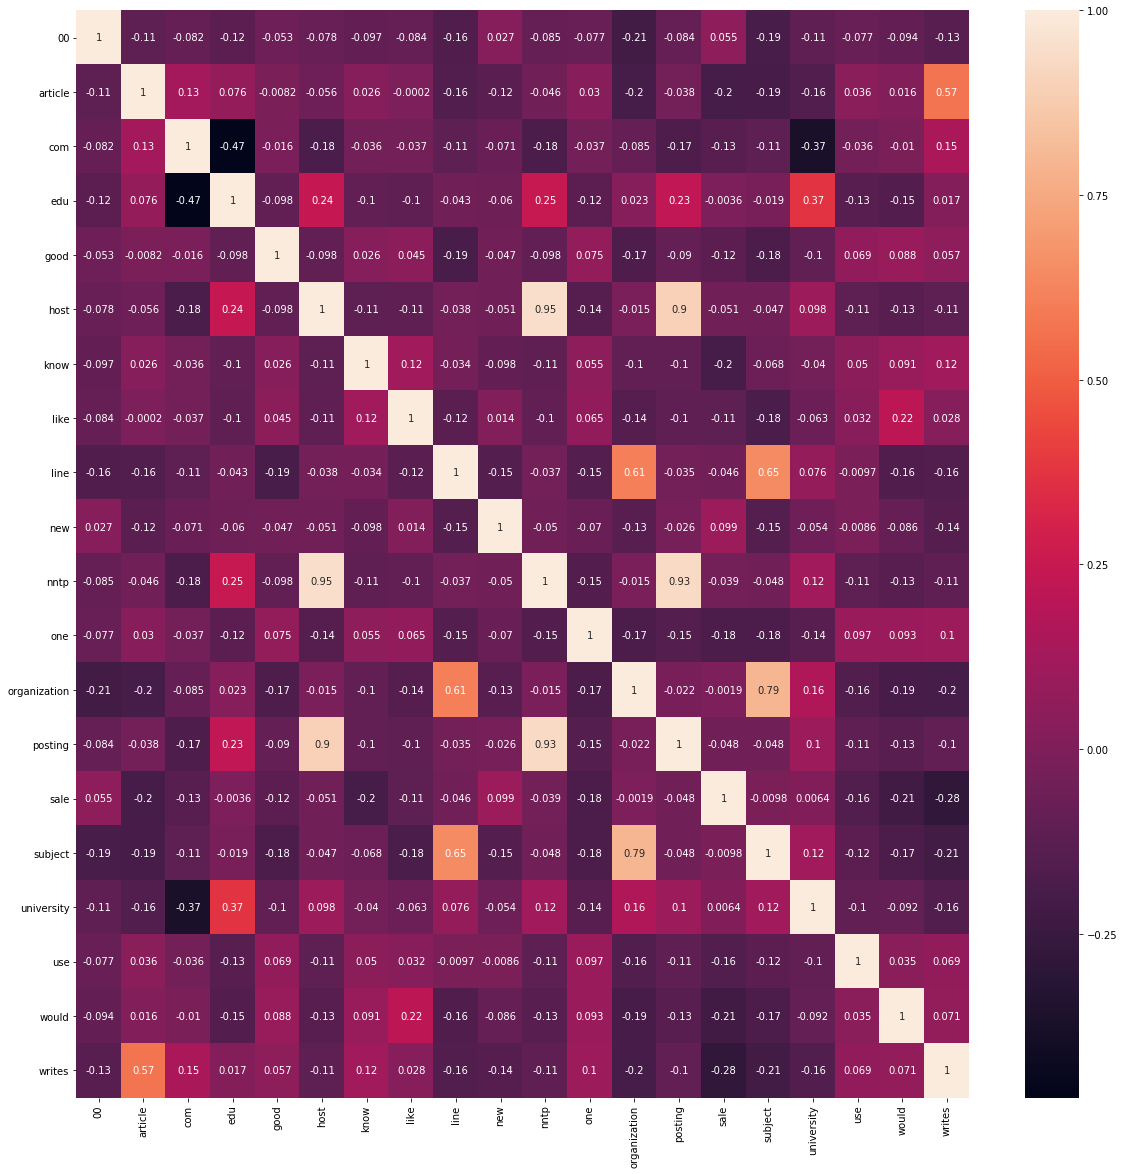

In [18]:
fig, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(correlation_matrix,annot=True)

To identify a pair of terms with high correlation, we created an upper triangular matrix from the correlation matrix. We also created a stacked array out of it and traversed it.

In [20]:
correlation_matrix_ut = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape)).astype(np.bool))
correlation_matrix_melted = correlation_matrix_ut.stack().reset_index()
correlation_matrix_melted.columns = ['word1', 'word2', 'correlation']
correlation_matrix_melted[(correlation_matrix_melted['word1']!=\
                           correlation_matrix_melted['word2']) & (correlation_matrix_melted['correlation']>.7)]

,word1,word2,correlation
95,host,nntp,0.953828
98,host,posting,0.896666
158,nntp,posting,0.934923
177,organization,subject,0.793946


In this step, we'll remove terms for which the coefficient of correlation is $> 0.7$ and create a separate <code>DataFrame</code> with the remaining terms.

In [21]:
tfidf_df_without_correlated_word = tfidf_df.drop(['nntp', 'posting', 'organization'], axis = 1)
tfidf_df_without_correlated_word.head()

,00,article,com,edu,good,host,know,like,line,new,one,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.0,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.0,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.0,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.0,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.0,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


<h2>Exercise 8: Dimensionality Reduction (PCA)</h2>
<br>
In this exercise, we will reduce the dimensionality of a tf-idf matrix representation of <code>fetch_20newsgroups</code> text dataset to two

In [28]:
from sklearn.datasets import fetch_20newsgroups
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from collections import Counter
from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

We will be using stop words from the English language only. <code>WordNet</code> states the lemmatizer we will be using.

In [23]:
stop_words = stopwords.words('english')
stop_words = stop_words + list(string.printable)
lemmatizer = WordNetLemmatizer()

To specify the categories of news articles we want to fetch by,

In [24]:
categories= ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

To fetch the dataset, corresponding to the categories mentioned earlier.

In [25]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)
news_data_df = pd.DataFrame({'text' : news_data['data'], 'category': news_data.target})
news_data_df.head()

,text,category
0,From: Steve@Busop.cit.wayne.edu (Steve Teolis)...,0
1,From: jks2x@holmes.acc.Virginia.EDU (Jason K. ...,0
2,From: wayne@uva386.schools.virginia.edu (Tony ...,1
3,From: lihan@ccwf.cc.utexas.edu (Bruce G. Bostw...,1
4,From: myoakam@cis.ohio-state.edu (micah r yoak...,0


Now, make use of the <code>lambda</code> function to extract tokens from each 'text' of the <code>news_data_df</code> <code>DataFrame</code>. Check whether any of these tokens are stop words, lemmatize them, and concatenate them side by side. We'll use the join function to concatenate a list of words into a single sentence. We'll use the regular expression (<code>re</code>) to replace anything other than letters, digits, and white spaces with blank space. 

In [26]:
news_data_df['cleaned_text'] = news_data_df['text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
                     for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

The following lines of code are used to create a tf-idf matrix and transform it into a DataFrame

In [27]:
tfidf_model = TfidfVectorizer(max_features=20)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(news_data_df['cleaned_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,00,article,com,edu,good,host,know,like,line,new,nntp,one,organization,posting,sale,subject,university,use,would,writes
0,0.719664,0.000000,0.000000,0.191683,0.0,0.124066,0.000000,0.153294,0.066931,0.520927,0.124370,0.0,0.068809,0.120711,0.161624,0.066888,0.255410,0.0,0.00000,0.000000
1,0.000000,0.000000,0.000000,0.219265,0.0,0.000000,0.353598,0.350704,0.153124,0.000000,0.000000,0.0,0.157421,0.000000,0.739523,0.153025,0.292162,0.0,0.00000,0.000000
2,0.000000,0.000000,0.000000,0.853563,0.0,0.000000,0.000000,0.000000,0.298044,0.000000,0.000000,0.0,0.306407,0.000000,0.000000,0.297852,0.000000,0.0,0.00000,0.000000
3,0.000000,0.267175,0.255208,0.567867,0.0,0.245034,0.000000,0.302760,0.132190,0.000000,0.245634,0.0,0.135900,0.238407,0.000000,0.132105,0.252221,0.0,0.28648,0.270283
4,0.000000,0.000000,0.000000,0.411807,0.0,0.266541,0.000000,0.000000,0.143793,0.000000,0.267194,0.0,0.147828,0.259333,0.694459,0.143700,0.274358,0.0,0.00000,0.000000


In this step, we are using <code>PCA</code> from <code>sklearn</code> to extract two principal components from the earlier data

In [29]:
pca = PCA(2)
pca.fit(tfidf_df)
reduced_tfidf = pca.transform(tfidf_df)
reduced_tfidf

array([[-0.18040211,  0.31757955],
       [-0.20033999,  0.37267925],
       [-0.44477443, -0.02223902],
       ...,
       [-0.0197252 ,  0.33025765],
       [-0.37961409, -0.17549989],
       [-0.46928541, -0.02581301]])

Now, we'll create a <code>scatter</code> plot along these principal components and represent each category with a separate color

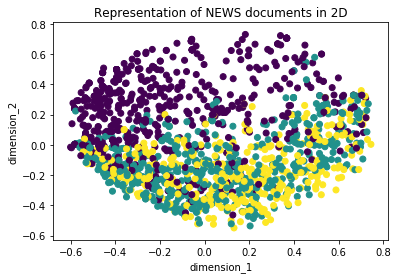

In [30]:
plt.scatter(reduced_tfidf[:, 0], reduced_tfidf[:, 1], c=news_data_df['category'], cmap='viridis')
plt.xlabel('dimension_1')
plt.ylabel('dimension_2')
plt.title('Representation of NEWS documents in 2D')
plt.show()

From the preceding figure, we can see that a scatter plot is created, where each category is represented by a different color.

<h2>Exercise 9: Calculate the RMSE and MAPE</h2>
<br>
In this exercise, we will calculate the RMSE and MAPE of a given dataset.

In [33]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

In [32]:
y_actual = [0,1,2,1,0]
y_predicted = [0.03,1.2,1.6,.9,0.1]
rms = sqrt(mean_squared_error(y_actual, y_predicted))
print('Root Mean Squared Error (RMSE) is:', rms)

Root Mean Squared Error (RMSE) is: 0.21019038988498018


We will use <code>mean_absolute_error</code> from <code>sklearn</code> to calculate the MAPE

In [34]:
y_actual = [0,1,2,1,0]
y_predicted = [0.03,1.2,1.6,.9,0.1]
mape = mean_absolute_error(y_actual, y_predicted) * 100
print('Mean Absolute Percentage Error (MAPE) is:', round(mape,2), '%')

Mean Absolute Percentage Error (MAPE) is: 16.6 %


<h1>Activity 5: Developing End-to-End Text Classifiers</h1>
<br>
In this activity, we will build an end-to-end classifier that classifies comments on Wikipedia articles. The classifier will classify comments as toxic or not. Use the following machine learning algorithms to classify the Wikipedia comments (classes: toxic or not):
<ul>
    <li>Logistic Regression.</li>
    <li>Random Forest.</li>
    <li>GBM.</li>
</ul>
<br>
Have in mind to resolve the exercise according this:
<ul>
    <li>Which tokens (i.e. words) seem to be important predictors while using Random Forest Classifier and GBM.</li>
</ul>
<br>
<b><i>Data source</i></b>: The data has been adapted from <a href='https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data'>Toxic Comment Classification Challenge</a> The dataset under CC0, with the underlying comment text being governed by Wikipedia's CC-SA-3.0.
<br>
<br>
<b>Import the Necessary Packages</b>

In [53]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import re
import string

from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score, roc_curve, classification_report, confusion_matrix, precision_recall_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from pylab import *
import nltk
import warnings
warnings.filterwarnings('ignore')

Create <code>clf_model(...)</code> method, in this method we fit the data for training a model, the model also predicts the dependent variable and its probability, this method returns the model, the predicted variable and the predicted probabilities.

In [43]:
def clf_model(model_type, X_train, y_train, X_valid):
    model = model_type.fit(X_train,y_train)
    predicted_labels = model.predict(X_valid)
    predicted_probab = model.predict_proba(X_valid)[:,1]
    return [predicted_labels,predicted_probab, model]

Create <code>model_evaluation(...)</code> method, in this method we evaluate the performance of the model such as confusion matrix, accuracy, precision, recall, F1 plot curve, and ROC curve.

In [44]:
def model_evaluation(actual_values, predicted_values, predicted_probabilities):
    cfn_mat = confusion_matrix(actual_values,predicted_values)
    print("confusion matrix: \n",cfn_mat)
    print("\naccuracy: ",accuracy_score(actual_values,predicted_values))
    print("\nclassification report: \n", classification_report(actual_values,predicted_values))
    fpr,tpr,threshold=roc_curve(actual_values, predicted_probabilities)
    print ('\nArea under ROC curve for validation set:', auc(fpr,tpr))
    fig, ax = plt.subplots(figsize=(6,6))
    ax.plot(fpr,tpr,label='Validation set AUC')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    ax.legend(loc='best')
    plt.show()

<b>Read the dataset from and clean it</b>

In [45]:
data = pd.read_csv('train_comment_small.csv')
data.head()

,comment_text,toxic
0,Explanation\nWhy the edits made under my usern...,0
1,D'aww! He matches this background colour I'm s...,0
2,"Hey man, I'm really not trying to edit war. It...",0
3,"""\nMore\nI can't make any real suggestions on ...",0
4,"You, sir, are my hero. Any chance you remember...",0


Check the distribution of the classes

In [46]:
data.toxic.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [47]:
# Create the lemmatizer
lemmatizer = WordNetLemmatizer()

In [48]:
# Indicate the language to indentify the stop words
stop_words = stopwords.words('english')

In [49]:
# Adding individual printable characters to list of stop words so that they get renoved along with the stopwords
stop_words = stop_words + list(string.printable)

We start cleaning the dataset

In [50]:
data['cleaned_comment_text'] = data['comment_text'].apply(\
lambda x : ' '.join([lemmatizer.lemmatize(word.lower()) \
                     for word in word_tokenize(re.sub(r'([^\s\w]|_)+', ' ', str(x))) if word.lower() not in stop_words]))

<b>Create a TF-IDF matrix out of it</b>

In [51]:
tfidf_model = TfidfVectorizer(max_features=500)
tfidf_df = pd.DataFrame(tfidf_model.fit_transform(data['cleaned_comment_text']).todense())
tfidf_df.columns = sorted(tfidf_model.vocabulary_)
tfidf_df.head()

,10,100,11,12,20,2005,2006,2007,2008,24,...,wp,write,writing,written,wrong,wrote,www,year,yes,yet
0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.537393,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


<b>Divide the data into a training and validation set</b>

In [52]:
X_train, X_valid, y_train, y_valid = train_test_split(tfidf_df, data.toxic, test_size=0.2, random_state=42, stratify=data.toxic)

<b>Develop classifier models for logistic regression, random forest, and GBM</b>

<b>Logistic Regression</b>

confusion matrix: 
 [[28677   179]
 [ 1733  1326]]

accuracy:  0.9400908663637788

classification report: 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97     28856
           1       0.88      0.43      0.58      3059

    accuracy                           0.94     31915
   macro avg       0.91      0.71      0.77     31915
weighted avg       0.94      0.94      0.93     31915


Area under ROC curve for validation set: 0.905196887739533


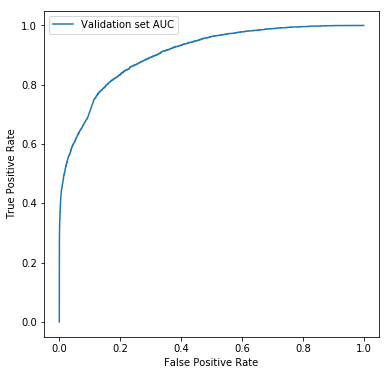

In [54]:
logreg = LogisticRegression()
results = clf_model(logreg, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])

<b>Random Forest Classifier</b>

confusion matrix: 
 [[28856     0]
 [ 2990    69]]

accuracy:  0.9063136456211812

classification report: 
               precision    recall  f1-score   support

           0       0.91      1.00      0.95     28856
           1       1.00      0.02      0.04      3059

    accuracy                           0.91     31915
   macro avg       0.95      0.51      0.50     31915
weighted avg       0.92      0.91      0.86     31915


Area under ROC curve for validation set: 0.8531297215658813


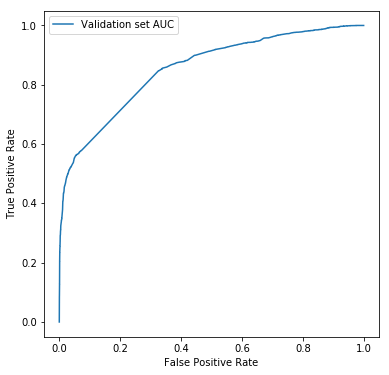

In [55]:
rfc = RandomForestClassifier(n_estimators=20,max_depth=4,max_features='sqrt',random_state=1)
results = clf_model(rfc, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])
model_rfc = results[2]

Which tokens (i.e. words) seem to be important predictors while using Random Forest Classifier

In [56]:
word_importances = pd.DataFrame({'word':X_train.columns,'importance':model_rfc.feature_importances_})
word_importances.sort_values('importance', ascending = False).head(20)

,word,importance
455,unpleasant,0.190242
49,awful,0.179852
42,as,0.160197
280,nightmare,0.047444
413,stupid,0.047368
469,waste,0.046508
68,carefree,0.030301
117,die,0.028085
432,thanks,0.022291
177,go,0.021641


<b>Gradient Boosting Classifier</b>

confusion matrix: 
 [[28720   136]
 [ 1833  1226]]

accuracy:  0.9383048723170923

classification report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97     28856
           1       0.90      0.40      0.55      3059

    accuracy                           0.94     31915
   macro avg       0.92      0.70      0.76     31915
weighted avg       0.94      0.94      0.93     31915


Area under ROC curve for validation set: 0.8613269841531662


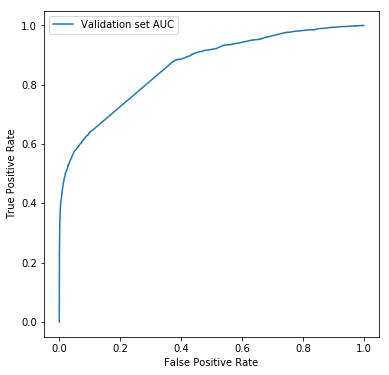

In [59]:
gbm_clf=GradientBoostingClassifier(loss='deviance', learning_rate=0.1, random_state=42)
results = clf_model(gbm_clf, X_train, y_train, X_valid)
model_evaluation(y_valid, results[0], results[1])
model_gbm = results[2]

Which tokens (i.e. words) seem to be important predictors while using Gradient Boosting Classifier

In [60]:
word_importances = pd.DataFrame({'word':X_train.columns,'importance':model_gbm.feature_importances_})
word_importances.sort_values('importance', ascending = False).head(20)

,word,importance
455,unpleasant,0.333566
49,awful,0.145337
413,stupid,0.129991
469,waste,0.077134
42,as,0.065021
280,nightmare,0.041241
68,carefree,0.030011
41,article,0.017948
192,hate,0.015986
117,die,0.011348


We have learned how to build end-to-end classifiers. Developing an end-to-end classifier was done in phases. Firstly, the text corpus was cleaned and tokenized, features were extracted using TF-IDF, then the dataset was divided into training and validation sets. Several machine learning algorithms, such as logistic regression, random forest, and GBM were used to develop classification models. Finally, their performances were measured using parameters such as confusion matrix, accuracy, precision, recall, F1 plot curve, and ROC curve. In the next section, you will learn how to build pipelines for NLP projects.

<h2>Exercise 10: Building Pipelines for NLP Projects</h2>
<br>
In this exercise, we will develop a pipeline that will allow us to create a TF-IDF matrix representation of  <code>fetch_20newsgroups</code> from <code>sklearn</code> text dataset.
<br>
<br>
Import the Necessary Packages

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import tree
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd

Specify categories of news articles we want to fetch by

In [65]:
categories = ['misc.forsale', 'sci.electronics', 'talk.religion.misc']

Fetch 20newsgroups dataset, corresponding to the categories mentioned earlier.

In [66]:
news_data = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42, download_if_missing=True)

Here, we'll define a pipeline consisting of two stages: <code>CountVectorizer</code> and <code>TfidfTransformer</code>

In [67]:
text_classifier_pipeline = Pipeline([('vect', CountVectorizer()), ('tfidf', TfidfTransformer())])
text_classifier_pipeline.fit(news_data.data, news_data.target)
pd.DataFrame(text_classifier_pipeline.fit_transform(news_data.data, news_data.target).todense()).head()

,0,1,2,3,4,5,6,7,8,9,...,26016,26017,26018,26019,26020,26021,26022,26023,26024,26025
0,0.165523,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.081279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Here, we created a pipeline consisting of the count vectorizer and TF-IDF transformer. The outcome of this pipeline is the TF-IDF representation of the text data that has been passed to it as an argument.



<h2>Exercise 11: Saving and Loading Models</h2>
<br>
In this exercise, first we will create a tf-idf representation of sentences. Then, we will save this model on disk.
<br>
<br>
Import the Necessary Packages

In [68]:
import pickle
from joblib import dump, load
from sklearn.feature_extraction.text import TfidfVectorizer

Defining a corpus consisting of four sentences

In [69]:
corpus = [
    'Data Science is an overlap between Arts and Science',
    'Generally, Arts graduates are right-brained and Science graduates are left-brained',
    'Excelling in both Arts and Science at a time becomes difficult',
    'Natural Language Processing is a part of Data Science'
]

Then, we'll fit a tf-idf model to it

In [70]:
tfidf_model = TfidfVectorizer()
print(tfidf_model.fit_transform(corpus).todense())

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176

Save this tf-idf model on disk using <code>joblib</code>.

In [71]:
dump(tfidf_model, 'tfidf_model.joblib') 

['tfidf_model.joblib']

Finally, we'll load this model from the disk to the memory and use it

In [72]:
tfidf_model_loaded = load('tfidf_model.joblib')
print(tfidf_model_loaded.fit_transform(corpus).todense())

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176

Save this tf-idf model on disk using <code>pickle</code>

In [73]:
pickle.dump(tfidf_model, open("tfidf_model.pickle.dat", "wb"))

Load this model from the disk to the memory and use it

In [74]:
loaded_model = pickle.load(open("tfidf_model.pickle.dat", "rb"))
print(loaded_model.fit_transform(corpus).todense())

[[0.40332811 0.25743911 0.         0.25743911 0.         0.
  0.40332811 0.         0.         0.31798852 0.         0.
  0.         0.         0.         0.31798852 0.         0.
  0.         0.         0.40332811 0.         0.         0.
  0.42094668 0.        ]
 [0.         0.159139   0.49864399 0.159139   0.         0.
  0.         0.         0.49864399 0.         0.         0.
  0.24932199 0.49864399 0.         0.         0.         0.24932199
  0.         0.         0.         0.         0.         0.24932199
  0.13010656 0.        ]
 [0.         0.22444946 0.         0.22444946 0.35164346 0.35164346
  0.         0.35164346 0.         0.         0.35164346 0.35164346
  0.         0.         0.35164346 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.18350214 0.35164346]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.30887228 0.         0.
  0.         0.         0.         0.30887228 0.39176